# Building an Image Classifier from Scratch

The main goal of this Project is to create an image classifier from scratch using the Keras package. I will create a binary classifier based on an object. The classifier will accept images and then predict whether or not a given image contains that object.


# Creating a Base Model without Image Augumentation

Searching in :  C:/Users/Prithvi/Desktop/DAB300/Lab/Lab 4/Dataset
Searching in :  C:/Users/Prithvi/Desktop/DAB300/Lab/Lab 4/Dataset\.ipynb_checkpoints
Searching in :  C:/Users/Prithvi/Desktop/DAB300/Lab/Lab 4/Dataset\HPtuner
Searching in :  C:/Users/Prithvi/Desktop/DAB300/Lab/Lab 4/Dataset\HPtuner\BestHP
Searching in :  C:/Users/Prithvi/Desktop/DAB300/Lab/Lab 4/Dataset\HPtuner\BestHP\trial_0a99a6e9c4b6d3ed1f2fc23309c7e947
Searching in :  C:/Users/Prithvi/Desktop/DAB300/Lab/Lab 4/Dataset\HPtuner\BestHP\trial_0a99a6e9c4b6d3ed1f2fc23309c7e947\checkpoints
Searching in :  C:/Users/Prithvi/Desktop/DAB300/Lab/Lab 4/Dataset\HPtuner\BestHP\trial_0a99a6e9c4b6d3ed1f2fc23309c7e947\checkpoints\epoch_0
Searching in :  C:/Users/Prithvi/Desktop/DAB300/Lab/Lab 4/Dataset\HPtuner\BestHP\trial_22fb6d30e2e018174cde695b38018678
Searching in :  C:/Users/Prithvi/Desktop/DAB300/Lab/Lab 4/Dataset\HPtuner\BestHP\trial_22fb6d30e2e018174cde695b38018678\checkpoints
Searching in :  C:/Users/Prithvi/Desktop/DAB300/La

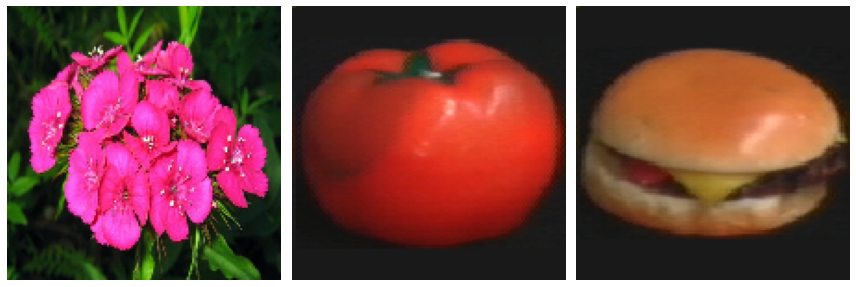

[[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 73, 73, 32)        9248      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 73, 73, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 73, 73, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 341056)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               43655296  
_________________________________________________________________
dense_1 (D

In [ ]:
#Importing requisite libraries
import os #used to iterate over directories created for the dataset
import numpy as np #used for converting img into an array, which is feed to the model
import pandas as pd #used for data analysis
from keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img #
from tensorflow.keras.models import Sequential #used to create an Sequential model 
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, Flatten,Dense,Activation,Dropout,MaxPooling2D 
import matplotlib.pyplot as plt #used for visualising the data points

#DATA VERIFICATION

dir = 'C:/Users/Prithvi/Desktop/DAB300/Lab/Lab 4/Dataset' #setting the directory path to variable dir

totalFiles = 0
totalDir = 0

#iterating through the directories using os module and counting the images in the folders
for base, dirs, files in os.walk(dir):
    print('Searching in : ',base)
    for directories in dirs:
        totalDir += 1
    for Files in files:
        totalFiles += 1

#printing the results
print('Total number of files',totalFiles)
print('Total Number of directories',totalDir)

#DATASET LOADING AND PROCESSING WITH IMAGE DATA GENERATORS

#rescaling the trainig/test/ validation images, so that they are on the scale of 0 to 1
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)

#setting the batch size
batch_size=5

#Using train generators without augumentation

#Using flow from directory to augument data in batches.
train_generator = train_datagen.flow_from_directory(
    directory=r'C:/Users/Prithvi/Desktop/DAB300/Lab/Lab 4/Dataset/train', #giving the path to train data
    target_size=(148, 148), #resizing the images to 148,148
    color_mode="rgb", #setting the image as rgb
    classes=['flowers','not flower'], #giving the class names
    batch_size=batch_size, #setting the batch size, data will be augumented in the batch sizes
    shuffle=True, #shuffling the data, so that the model doesnt images of same class in a row and get biased
    seed=123 #setting the seed 
)


valid_generator = valid_datagen.flow_from_directory(
    directory=r'C:/Users/Prithvi/Desktop/DAB300/Lab/Lab 4/Dataset/validation',#giving the path to validation data
    target_size=(148, 148),#resizing the images to 148,148
    color_mode="rgb",#setting the image as rgb
    batch_size=batch_size,#setting the batch size, data will be augumented in the batch sizes
    classes=['flowers','not flower'],#giving the class names
    shuffle=True,#shuffling the data, so that the model doesnt images of same class in a row and get biased
    seed=123
)

test_generator = test_datagen.flow_from_directory(
    directory=r'C:/Users/Prithvi/Desktop/DAB300/Lab/Lab 4/Dataset/test',#giving the path to test data
    target_size=(148, 148),#resizing the images to 148,148
    color_mode="rgb",#setting the image as rgb
    classes=['flower', 'not flower'],#giving the class names
    batch_size=1,
    shuffle=False,
    seed=123
)

#plotting the images from the training data

img,labels=next(train_generator)

#defining a function which will plot the images
def plotImages(images_arr):
    fig, axes=plt.subplots(1,3, figsize=(12,6)) #Using subplots we are setting images in 1 row 3 columns 
    axes= axes.flatten()
    for img,ax in zip(images_arr,axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
    
plotImages(img)
print(labels)

# CREATING AND EVALUATING AN SEQUENTIAL MODEL

model = Sequential([
    #(4Conv2d Layers)
    Conv2D(filters=32, 
           kernel_size=(3, 3), 
           strides=1, 
           padding='same', 
           activation='relu',
           input_shape=(148, 148, 3)),
    Conv2D(filters=32, 
           kernel_size=(3, 3), 
           strides=2, 
           padding='valid',
           activation='relu'),
    Conv2D(filters=64, 
           kernel_size=(3, 3), 
           strides=1, 
           padding='same', 
          activation='relu'),
    Conv2D(filters=64, 
           kernel_size=(3, 3), 
           strides=1, 
           padding='same', 
          activation='relu'),
    Flatten(),# this converts our 3D feature maps to 1D feature vectors
    Dense(128, activation='relu'),
    Dense(2, activation='sigmoid')
])

#compiling the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#printing the model summary
model.summary()

hist=model.fit(
        train_generator,
        epochs=10,
        steps_per_epoch=len(train_generator) / 5,
        validation_data=valid_generator,
        verbose=2
)

#EVALUATING THE MODEL ON TEST DATA

test_loss, test_acc = model.evaluate(test_generator)
print('test_acc:', test_acc)


history_dict = hist.history
loss_values = history_dict['loss']   # training loss
val_loss_values = history_dict['val_loss'] # validation loss

epochs = range(1, len(loss_values)+1)  #creates list of integers to match the number of epochs of training

# code to plot the results
plt.plot(epochs, loss_values, 'b', label="Training Loss")
plt.plot(epochs, val_loss_values, 'r', label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Loss")
plt.legend()
plt.show()

# As above, but this time we want to visualize the training and validation accuracy
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'b', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Accuracy")
plt.legend()
plt.show()






# Checking Model Performance When Data Augmentation is used



Searching in :  C:/Users/Prithvi/Desktop/DAB300/Lab/Lab 4/Dataset
Searching in :  C:/Users/Prithvi/Desktop/DAB300/Lab/Lab 4/Dataset\preview
Searching in :  C:/Users/Prithvi/Desktop/DAB300/Lab/Lab 4/Dataset\test
Searching in :  C:/Users/Prithvi/Desktop/DAB300/Lab/Lab 4/Dataset\test\flower
Searching in :  C:/Users/Prithvi/Desktop/DAB300/Lab/Lab 4/Dataset\test\not flower
Searching in :  C:/Users/Prithvi/Desktop/DAB300/Lab/Lab 4/Dataset\train
Searching in :  C:/Users/Prithvi/Desktop/DAB300/Lab/Lab 4/Dataset\train\flowers
Searching in :  C:/Users/Prithvi/Desktop/DAB300/Lab/Lab 4/Dataset\train\not flower
Searching in :  C:/Users/Prithvi/Desktop/DAB300/Lab/Lab 4/Dataset\validation
Searching in :  C:/Users/Prithvi/Desktop/DAB300/Lab/Lab 4/Dataset\validation\flowers
Searching in :  C:/Users/Prithvi/Desktop/DAB300/Lab/Lab 4/Dataset\validation\not flower
Total number of files 160
Total Number of directories 10
Found 100 images belonging to 2 classes.
Epoch 1/10
20/20 - 4s - loss: 0.0825 - accurac

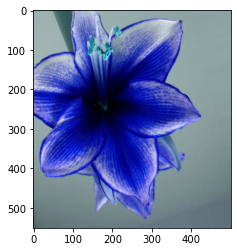

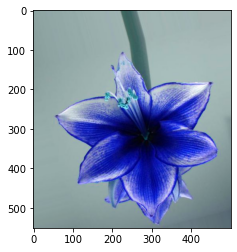

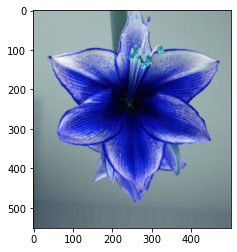

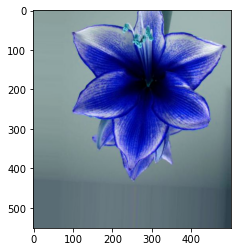

In [16]:
from PIL import Image

#DATA VERIFICATION
dir = 'C:/Users/Prithvi/Desktop/DAB300/Lab/Lab 4/Dataset' #setting the directory path to variable dir

totalFiles = 0
totalDir = 0

#iterating through the directories using os module and counting the images in the folders
for base, dirs, files in os.walk(dir):
    print('Searching in : ',base)
    for directories in dirs:
        totalDir += 1
    for Files in files:
        totalFiles += 1

#printing the results
print('Total number of files',totalFiles)
print('Total Number of directories',totalDir)

#DATA AUGUMENTATION

#Setting the parameters for augumentation, Imagedatagenerator eill use the parameters to augument the images in the DS
datagen=ImageDataGenerator(rotation_range=40,
                           rescale=1./255,#rescaling the images so that it is between 0 to 1
                      width_shift_range=0.2,
                      height_shift_range=0.2,
                      shear_range=0.2,
                      zoom_range=0.2,#will be used to zoom the image while augumenting
                      channel_shift_range=10.,
                      horizontal_flip=True,#will horizontally fill the image while augumenting
                      vertical_flip=True, #will vertically fill the image while augumenting
                      fill_mode='nearest')

#PRINTING SAMPLE AUGUMENTED IMAGES

#Grabing an image from trainig data and augumenting it, to see how the augumentation works
img = load_img(r'C:/Users/Prithvi/Desktop/DAB300/Lab/Lab 4/Dataset/train/flowers/image_04859.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with 3 dimension
x = x.reshape((1,) + x.shape)  # this is a Numpy array 4 dimension

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='preview', 
                          save_prefix='flower', 
                          save_format='jpg'):
    i += 1
    if i > 3:
        break  # otherwise the generator would loop indefinitely

#viewing the augumented images from the preview folder
import cv2
path=r'C:\Users\Prithvi\Desktop\DAB300\Lab\Lab 4\Dataset\preview'
images_aug=os.listdir(path)

for img in images_aug:
    img_arr=cv2.imread(os.path.join(path,img))
    plt.figure()
    plt.imshow(img_arr)


#Augumenting the training data by using the Image data generator
train_generator_aug=datagen.flow_from_directory(
    directory=r'C:/Users/Prithvi/Desktop/DAB300/Lab/Lab 4/Dataset/train',
    target_size=(148, 148),#resizing the image to 148,148
    color_mode="rgb", #setting the image as color
    classes=['flowers','not flower'],# setting the classes of the image
    batch_size=batch_size,
    shuffle=True,
    seed=123
)

#EVALUATING THE BASELINE MODEL USING AUGUMENED TRAINING DATA

#fitting the augumented data to the base model to see how the augumentation improves the accuracy 
hist_2=model.fit(train_generator_aug,
        epochs=10,
        steps_per_epoch=20,
        verbose=2)

#TESTING THE BASELINE MODEL TRAINED ON AUGUMENTED TRAINING DATA ON VALIDATION DATA
val_loss, val_acc = model.evaluate(valid_generator)
print('val_acc:', val_acc)




# TUNING THE BASELINE MODEL USING KERAS TUNER 

Trial 6 Complete [00h 01m 43s]
accuracy: 0.7549999952316284

Best accuracy So Far: 0.7549999952316284
Total elapsed time: 00h 05m 57s
INFO:tensorflow:Oracle triggered exit
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 408)     11424     
_________________________________________________________________
activation (Activation)      (None, 148, 148, 408)     0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 408)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 74, 74, 312)       1145976   
_________________________________________________________________
activation_1 (Activation)    (None, 74, 74, 312)       0         
_________________________________________________________________
max_pooling2d_1 

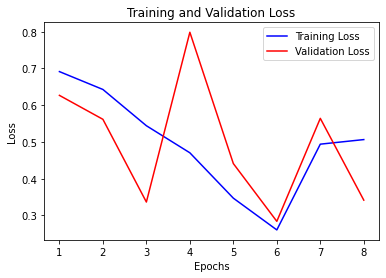

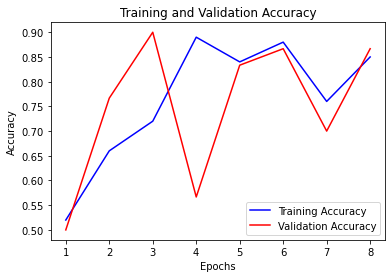

In [4]:
from keras_tuner import Hyperband
import keras_tuner as kt
import tensorflow as tf

#Using Keras Tuner, I am gonna find the best Hyperparameters and tune the model

def build_model(hp):
    model = keras.models.Sequential()#Initiang the sequential model
    #First Layer for the model
    model.add(Conv2D(hp.Int("input_units",
                            min_value=8,
                            max_value=512,
                            step=8),(3, 3), padding='same',input_shape=(148,148,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #Second layer can have 1-6 cnn layers with Maxpooling2D layer
    for i in range(hp.Int('n_layers',1,6)):
        model.add(Conv2D(hp.Int(f"conv_{i}_units",min_value=8,max_value=512,step=8),(3, 3),padding='same'))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
    #Flattening the Inputs before feeding to the dense layer
    model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
    for i in range(hp.Int('n_connections',1,4)):
        model.add(Dense(hp.Choice(f'n_nodes',
                                  values=[128, 256, 512, 1024])))#giving a range of nodes to try
        model.add(Activation('relu'))
    model.add(Dense(2))
    model.add(Activation("softmax"))

    model.compile(optimizer="adam",
                  loss="categorical_crossentropy",
                  metrics=["accuracy"])
    
    return model

#Using Keras Hyperband to find the best model
tuner=Hyperband(
    build_model,
    objective=kt.Objective('accuracy',direction='max'),
    max_epochs=3,#Max no of epochs
    executions_per_trial=2,
    factor=3,
    directory='HPtuner',
    project_name="BestHP"#Giving the project name    
)

stop_early=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)
#Feeding the data for the Tuner to give the best HPS
tuner.search(train_generator_aug,epochs=10,validation_data=valid_generator, callbacks=[stop_early])

#Getting the best HP
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

best_model=tuner.hypermodel.build(best_hps)


#Printing the summary of the best model
best_model.summary()


# Build the model with the optimal hyperparameters and train it on the data for 10 epochs
hist_8 = best_model.fit(train_generator_aug, epochs=10, validation_data=valid_generator)

val_acc_per_epoch = hist_8.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

#Re-instantiate the hypermodel and train it with the optimal number of epochs from above.
hypermodel=tuner.hypermodel.build(best_hps)
# Retrain the model
hypermodel_tuned=hypermodel.fit(train_generator_aug, epochs=best_epoch, validation_data=valid_generator)

#evaluating the hypermodel on the test data.
eval_result = hypermodel.evaluate(test_generator)
print("[test loss, test accuracy]:", eval_result)


# the dictionary that has the information on loss and accuracy per epoch

history_dict_8 = hypermodel_tuned.history
loss_values_8 = history_dict_8['loss']   # training loss
val_loss_values_8 = history_dict_8['val_loss'] # validation loss

epochs_8 = range(1, len(loss_values_8)+1)  #creates list of integers to match the number of epochs of training

# code to plot the results
plt.plot(epochs_8, loss_values_8, 'b', label="Training Loss")
plt.plot(epochs_8, val_loss_values_8, 'r', label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.xticks(epochs_8)
plt.ylabel("Loss")
plt.legend()
plt.show()

# As above, but this time we want to visualize the training and validation accuracy
acc_values_8 = history_dict_8['accuracy']
val_acc_values_8 = history_dict_8['val_accuracy']

plt.plot(epochs_8, acc_values_8, 'b', label="Training Accuracy")
plt.plot(epochs_8, val_acc_values_8, 'r', label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.xticks(epochs_8)
plt.ylabel("Accuracy")
plt.legend()
plt.show()